<a href="https://colab.research.google.com/github/85jahnavi/MachineLearning_Assignments/blob/main/EDA_on_Super_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Super Market Analysis Dataset



* Here the aim is to optimize business strategies , by analysing above data set we can identify -


    1.   Customer behaviour
    2.   Spending Patterns




In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Reading the dataset
df=pd.read_csv("/content/SuperMarket Analysis.csv")
df.shape

(1000, 17)

In [15]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
df.Payment.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [17]:
#Exploring data
df.info()
df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,count
object,9
float64,7
int64,1


In [18]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [22]:
#Checking is there any inconsistency
df.isnull().sum().sum()#checking null values

0


In [23]:
#checking duplicate rows
df.duplicated().sum()

0

# Which city generates highest total sales?

In [27]:
df['Total']=df['Unit price']*df['Quantity']

In [28]:
city_sales = df.groupby('City')['Total'].sum()
city_sales

,Total
City,
Mandalay,101140.64
Naypyitaw,105303.53
Yangon,101143.21


In [29]:
city_sales = city_sales.sort_values(ascending=False)
city_sales

,Total
City,
Naypyitaw,105303.53
Yangon,101143.21
Mandalay,101140.64


# Visualizing city wise sales

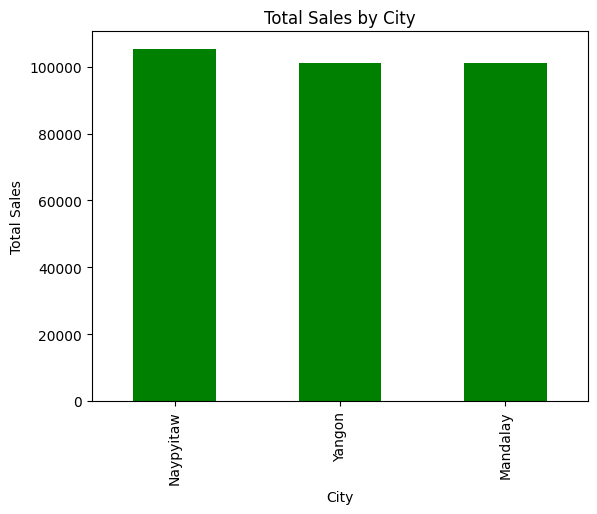

In [31]:
city_sales.plot(kind='bar', color='green')
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

# What are the total sales for each product?

In [33]:
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_sales

,Total
Product line,
Food and beverages,53471.28
Sports and travel,52497.93
Electronic accessories,51750.03
Fashion accessories,51719.90
Home and lifestyle,51297.06
Health and beauty,46851.18


# Visualizing product sales

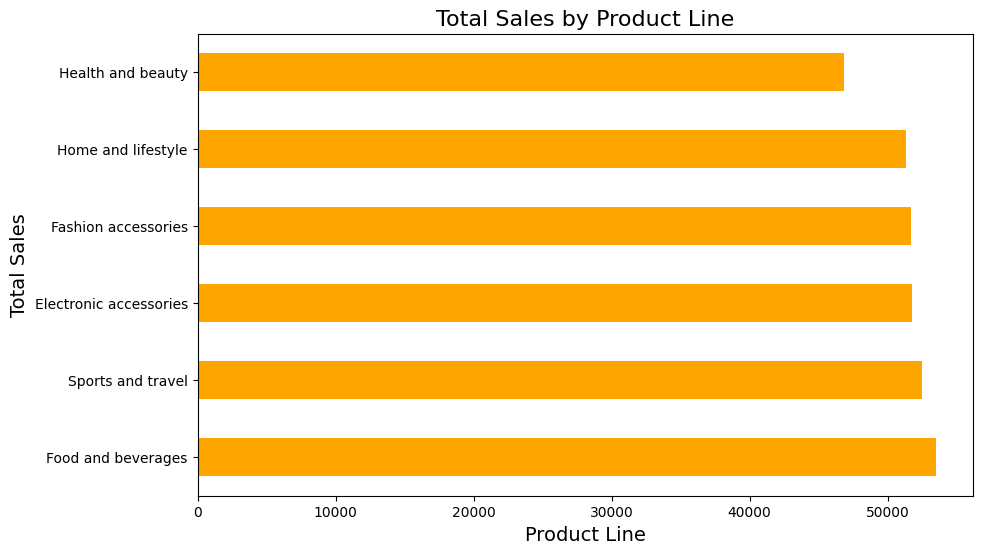

In [36]:
#Plot the data
product_sales.plot(kind='barh', color='orange', figsize=(10, 6))
plt.title("Total Sales by Product Line", fontsize=16)
plt.xlabel("Product Line", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.show()

# Average spending of member vs Normal Customers

In [41]:
customer_spending = df.groupby('Customer type')['Total'].mean()
customer_spending

,Total
Customer type,
Member,319.755186
Normal,291.783218


# Sales distrubution

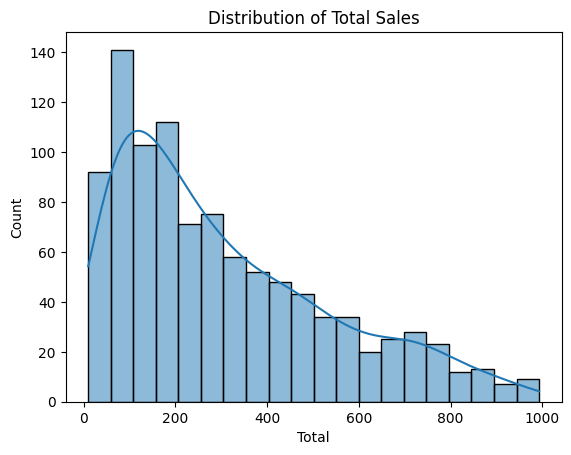

In [42]:
sns.histplot(df['Total'], bins=20, kde=True)
plt.title("Distribution of Total Sales")
plt.show()

In [43]:
#Do males and females differ in avg spending?
gender_spending = df.groupby('Gender')['Total'].mean()
gender_spending


,Total
Gender,
Female,324.696585
Male,284.814988


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


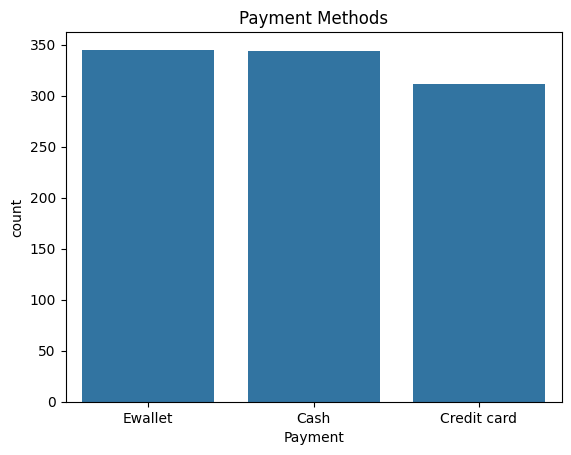

In [46]:
payment_count = df['Payment'].value_counts()
print(payment_count)
sns.countplot(data=df, x='Payment')
plt.title("Payment Methods")
plt.show()

All payment methods are used equally according to the data

# Sales by day of the weeek

In [48]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
sales_by_day = df.groupby('Day')['Total'].sum()
sales_by_day

,Total
Day,
Friday,41834.61
Monday,36094.36
Saturday,53448.39
Sunday,42340.85
Thursday,43189.76
Tuesday,49030.71
Wednesday,41648.70


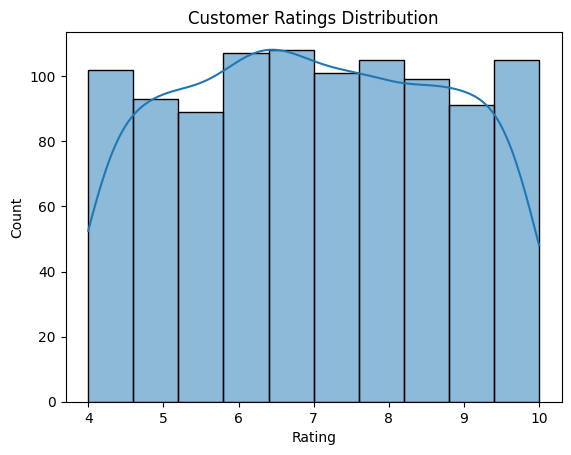

In [49]:
#What is the overall distribution of customer ratings
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Customer Ratings Distribution")
plt.show()

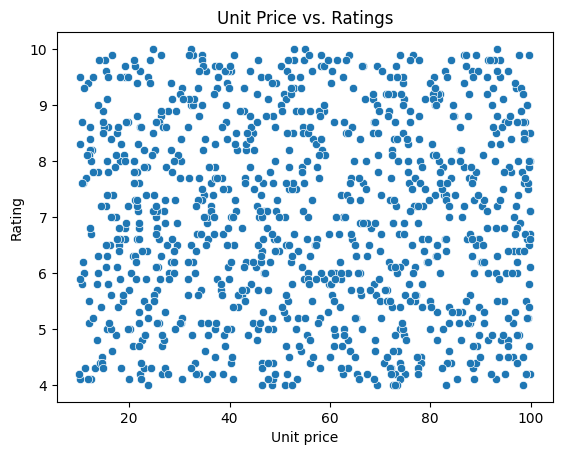

In [51]:
#Unit price influence on customer ratings
sns.scatterplot(data=df, x='Unit price', y='Rating')
plt.title("Unit Price vs. Ratings")
plt.show()

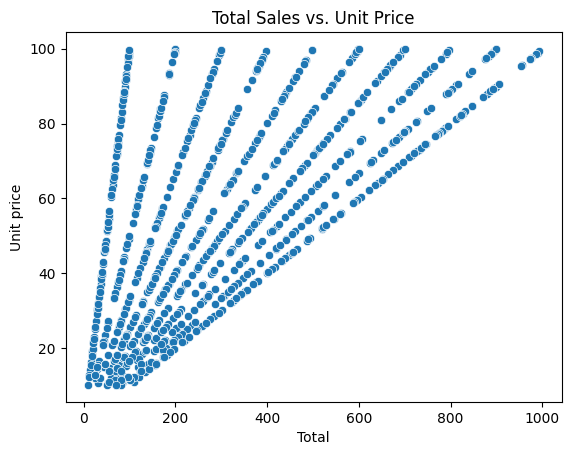

In [52]:
#Sales vs Unitprice
sns.scatterplot(data=df, x='Total', y='Unit price')
plt.title("Total Sales vs. Unit Price")
plt.show()

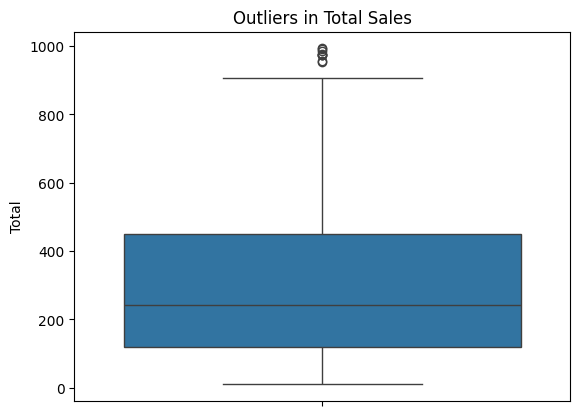

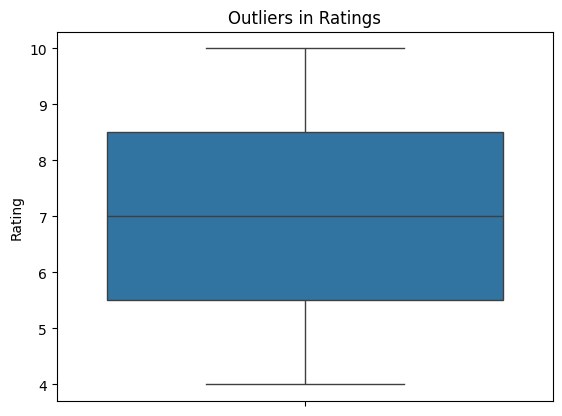

In [39]:
#Checking outliers in data
sns.boxplot(data=df, y='Total')
plt.title("Outliers in Total Sales")
plt.show()
print()
sns.boxplot(data=df, y='Rating')
plt.title("Outliers in Ratings")
plt.show()

# Conclusion

From above details we can conclude that higher **Unit Prices** correlate with increased **Total Sales**. Sales peak on **Saturday** and **Tuesday**, likely due to higher customer traffic. The **Total Sales** histogram shows most transactions are small, with fewer high-value sales.